In [13]:
!pip install pandas numpy tensorflow matplotlib joblib scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import joblib
from sklearn.metrics import mean_squared_error

In [15]:
model = tf.keras.models.load_model('stock_lstm_model.h5')

In [16]:
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [17]:
scaler = joblib.load('scaler.pkl')

In [18]:
predictions = model.predict(X_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [19]:
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
df = pd.read_csv(
    'AAPL_raw.csv',
    skiprows=3,
    names=['Date', 'Close', 'High', 'Low', 'Open', 'Volume'],
    index_col='Date',
    parse_dates=True
)

df = df.sort_index()  
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,24.261044,24.729267,23.821668,24.718171,212818400
2015-01-05,23.577574,24.110150,23.391173,24.030263,257142000
2015-01-06,23.579794,23.839424,23.218085,23.641928,263188400
2015-01-07,23.910437,24.010294,23.677434,23.788387,160423600
2015-01-08,24.829134,24.886830,24.121251,24.238863,237458000


In [21]:
print(type(test_dates))         # Should be <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
print(test_dates[:5])           # First 5 dates
print(len(test_dates), len(predictions))

<class 'pandas.core.indexes.range.RangeIndex'>
RangeIndex(start=2197, stop=2202, step=1)
475 475


Test dates: 475 Predictions: 475


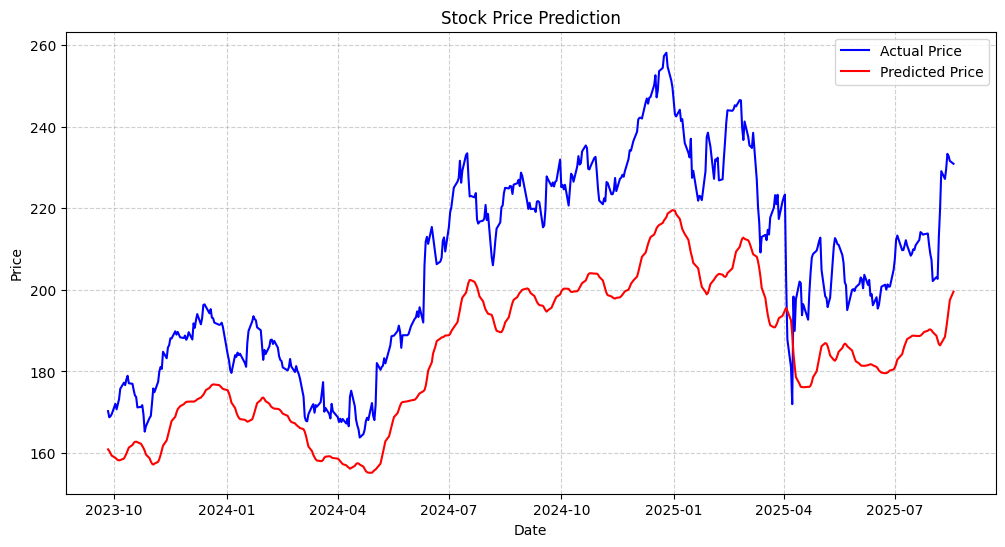

In [22]:
step = 60  

# Get the test portion of dates and shift by step
train_size = int(len(df) * 0.8)
test_dates = df.index[train_size + step:]

# Ensure lengths match
print("Test dates:", len(test_dates), "Predictions:", len(predictions))

# Plot
plt.figure(figsize=(12,6))
plt.plot(test_dates, y_test_scaled, color='blue', label='Actual Price')
plt.plot(test_dates, predictions, color='red', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

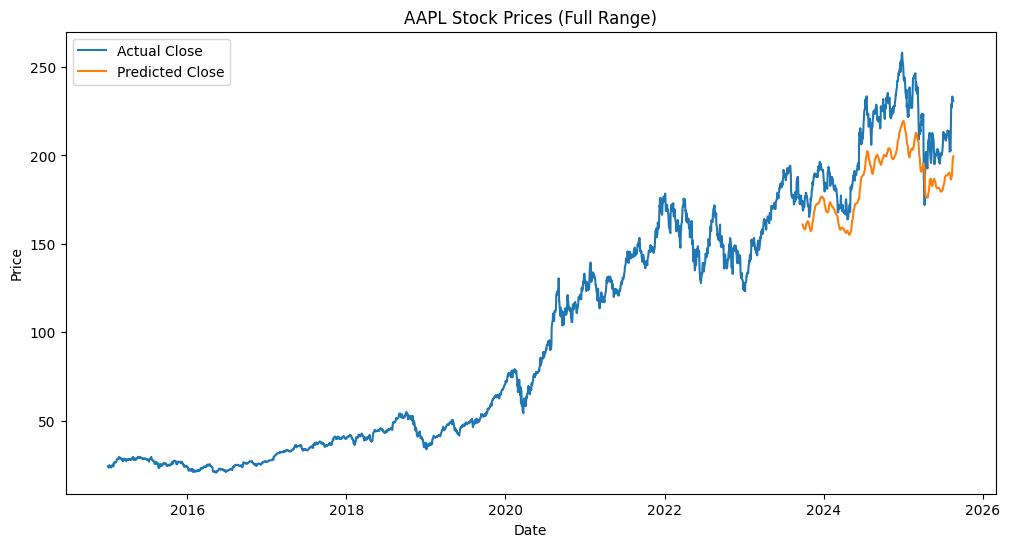

In [26]:
df_full = df.copy()

# Add a column for predictions, fill training part with NaN
df_full['Predicted_Close'] = np.nan
df_full.iloc[-len(predictions):, df_full.columns.get_loc('Predicted_Close')] = predictions

# Plot
plt.figure(figsize=(12,6))
plt.plot(df_full.index, df_full['Close'], label='Actual Close')
plt.plot(df_full.index, df_full['Predicted_Close'], label='Predicted Close')
plt.title('AAPL Stock Prices (Full Range)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [27]:
df.tail(1)


,Close,High,Low,Open,Volume
Date,,,,,
2025-08-18,230.889999,233.119995,230.110001,231.699997,37451700


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test_scaled, predictions))
mae = mean_absolute_error(y_test_scaled, predictions)
r2 = r2_score(y_test_scaled, predictions)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 23.19
MAE: 21.70
R² Score: 0.0287
